# Image Classification using ANN

We will be working on the dataset residing in the Tensorflow called `mnist dataset`. We going to work on a classification problem using images with Tensorflow 2.0.


In [ ]:
# First things first import the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##1. Get the data

In [ ]:
# Load the data from the Tensorflow datasets
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

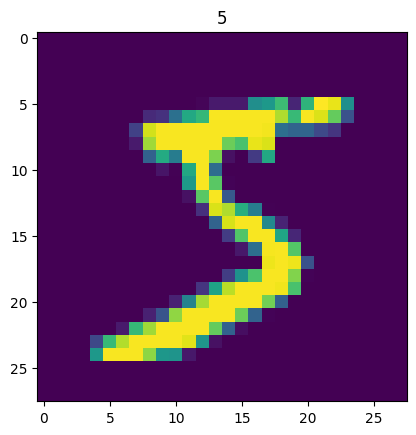

In [ ]:
# Let's Visualize the image
plt.imshow(X_train[0])
plt.title(y_train[0]);

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

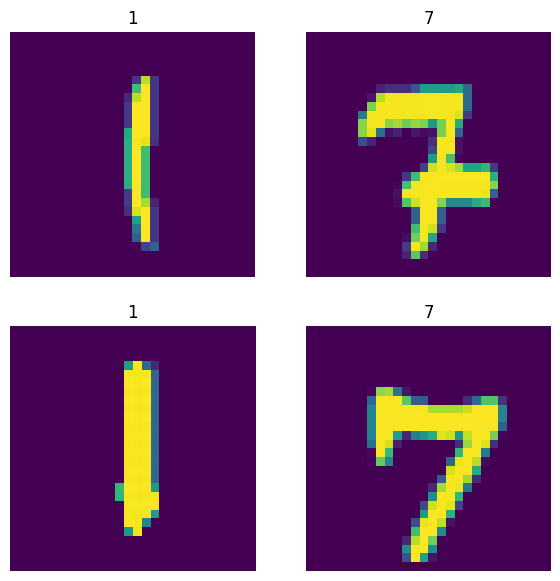

In [ ]:
# Let's visualize some random images
import random

# Set figure size
plt.figure(figsize = (7,7))

# Run a loop to plot 4 random images
for i  in range(4):
  ax = plt.subplot(2, 2, i+1)
  random_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[random_index])
  plt.title(y_train[random_index])
  plt.axis(False);

##2. Rescaling the data
Now that we have got acquainted with the data, we will perform preprocessing on the data.

In [ ]:
# Let's normalize the data by rescaling it
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

##3. Let's build the model

In [ ]:
# Set the random seed for reproducibililty
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'sigmoid')
])

# Compile the model
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

# Fit the model
hist = model.fit(X_train, y_train, epochs = 20, verbose = True)

Epoch 1/20
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2565 - accuracy: 0.9267
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1118 - accuracy: 0.9674
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0759 - accuracy: 0.9769
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0576 - accuracy: 0.9822
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0434 - accuracy: 0.9868
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0351 - accuracy: 0.9889
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0271 - accuracy: 0.9916
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0228 - accuracy: 0.9929
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0182 - accuracy: 0.9943
Epoch 10/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.

##4. Evaluate the model

In [ ]:
# Evaluate the model on test data
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1073 - accuracy: 0.9778


[0.10728230327367783, 0.9778000116348267]

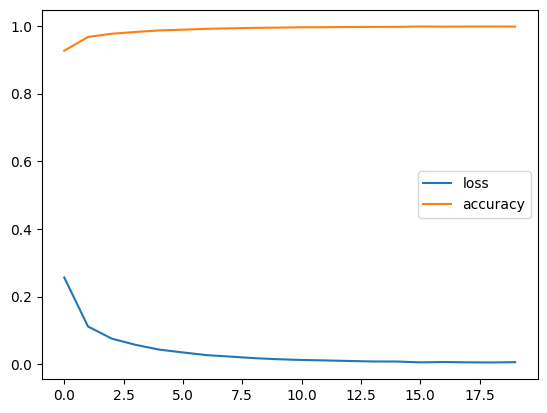

In [ ]:
# Let's plot the loss and accuracy curves
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['accuracy'], label = 'accuracy')
plt.legend();

In [ ]:
##5. Make Predictions on the model
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[1.9663703e-06, 1.3432209e-08, 1.4351787e-04, 2.3597865e-01,
        2.1395056e-14, 2.9226957e-04, 1.9981867e-18, 1.0000000e+00,
        1.4740837e-05, 8.7255704e-01],
       [1.0985250e-03, 1.5972884e-02, 9.9999958e-01, 8.3958270e-08,
        5.0184535e-21, 2.4379415e-10, 3.1773588e-01, 8.4609645e-16,
        2.0525753e-01, 2.3761860e-13],
       [6.8830186e-09, 9.9999511e-01, 4.1135345e-02, 6.0171255e-06,
        7.1174226e-04, 1.9678312e-06, 2.6133812e-06, 2.3028158e-02,
        3.7121300e-02, 1.9231600e-06],
       [1.0000000e+00, 1.1308174e-10, 8.9391484e-04, 1.9476598e-10,
        2.7470819e-09, 1.2290826e-02, 2.2092740e-06, 2.9905577e-05,
        1.0633988e-11, 6.8906636e-04],
       [2.4179076e-06, 1.4197276e-09, 5.5018239e-07, 3.1405854e-11,
        9.9999970e-01, 3.8745779e-07, 9.8194119e-05, 2.8756401e-02,
        2.1104559e-06, 9.9798214e-01]], dtype=float32)

In [ ]:
# Plot the model predictions with our original data
y_pred = y_pred.argmax(axis = 1)
y_pred[:5]

array([7, 2, 1, 0, 4])

In [ ]:
y_test[0], y_pred[0]

(7, 7)

In [ ]:
y_test[:9]

array([7, 2, 1, 0, 4, 1, 4, 9, 5], dtype=uint8)

In [ ]:
y_pred[:9]

array([7, 2, 1, 0, 4, 1, 4, 9, 5])

In [ ]:
# Let's define the class labels for the data
classes = list([i for i in range(11)])
classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# Let's define a function to plot a random image and prediction for the image
def plot_and_pred(model, images, true_labels, classes):
  """
  This function plots the random images along with their True and Predicted
  labels.
  """
  misclassified = []
  i = random.randint(0, len(images))
  target_image = images[i]
  predicted_prob = model.predict(target_image.reshape(1,28,28))
  predicted_label = classes[predicted_prob.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image)

  # Change the color of labels if they aren't equal
  if true_label == predicted_label:
    color = 'green'

  else:
    color = 'red'

  plt.title(f"Predicted Label: {predicted_label} Match Percent: {tf.reduce_max(predicted_prob)*100:2.0f}% True Label: {true_label}",
             color = color)

1/1 [==============================] - 0s 22ms/step


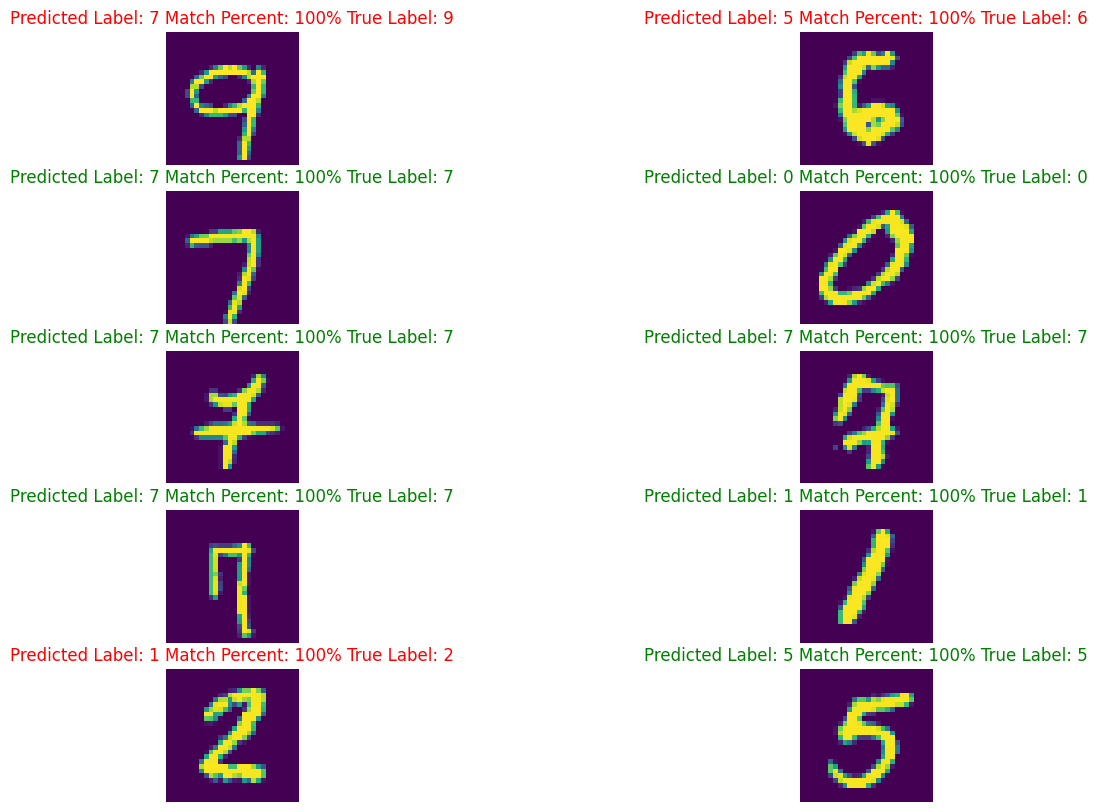

In [ ]:
# Let's plot and pred the model for random images
plt.figure(figsize=(15,10))
for i in range(10):
  ax = plt.subplot(5, 2, i+1)
  plot_and_pred(model = model,
              images = X_test,
              true_labels = y_test,
              classes = classes)
  plt.axis(False)

Looks like our model is performing well using the simple neural network architechture. Now, let's try to modelling our neural networks in a different way.

Let's create the same model using the functional API.

## Building the model using the Functional API

In [ ]:
# Import the necessary libraries
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
# Let's define the inputs to our network
input = Input(shape = (28, 28), name = 'input_image')
x = Flatten()(input)
output = Dense(128, activation = 'relu')(x)

fun_output = Model(input, output, name = 'feature_extractor')
fun_output.summary()

Model: "feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
Total params: 100480 (392.50 KB)
Trainable params: 100480 (392.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Let's create the classifier
classifier = fun_output(input)
y = Dense(10, activation = 'sigmoid')(classifier)

model_1 = Model(input, y, name = 'classifier')
model_1.summary()

Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 feature_extractor (Functio  (None, 128)               100480    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model_1.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
# Fit the model
hist_1 = model_1.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2595 - accuracy: 0.9257
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1131 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0763 - accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0563 - accuracy: 0.9830
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0432 - accuracy: 0.9866


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 feature_extractor (Functio  (None, 128)               100480    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Let't plot the loss and accuracy curves
def plot_loss_curves(history):
  loss = history.history['loss']
  accuracy = history.history['accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label = 'loss')
  plt.plot(epochs, accuracy, label = 'accuracy', color = 'orange')
  plt.legend()
  plt.show()

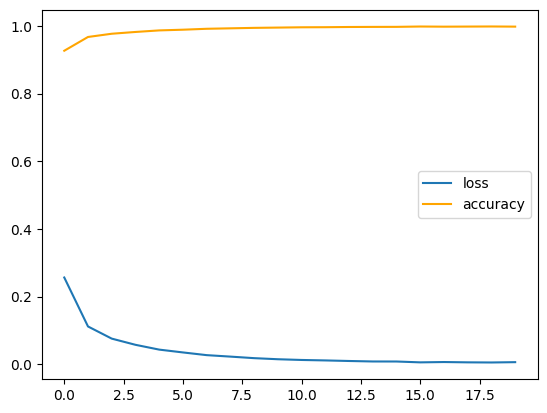

In [ ]:
# Let's plot the loss and accuracy curves
plot_loss_curves(hist)

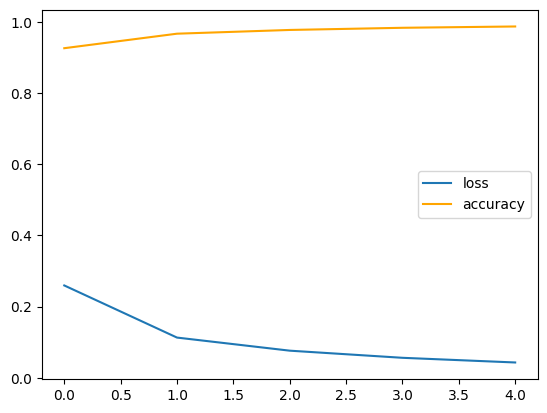

In [ ]:
# Plot the same for other model
plot_loss_curves(hist_1)

## Let's Build the model using the model subclassing method

In [ ]:
# Let's import the necessary modules
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import InputLayer

In [ ]:
# Let's define the feature extractor
class FeatureExtractor(Layer):
  def __init__(self):
    super(FeatureExtractor, self).__init__()
    self.input_1 = InputLayer(input_shape = (28,28))
    self.flatten_1 = Flatten()
    self.Dense_1 = Dense(128, activation = 'relu')

  def call(self, x, training):
    #x = self.input_1(x)
    x = self.flatten_1(x)
    x = self.Dense_1(x)

    return x

feature_extract = FeatureExtractor()

In [ ]:
# define the class for classifier
class Classifier(Model):
  def __init__(self):
    super(Classifier, self).__init__()
    self.extract_features = FeatureExtractor()
    self.dense_1 = Dense(10, activation = 'sigmoid')

  def call(self, x, training):
    x = self.extract_features(x)
    x = self.dense_1(x)

    return x

model_2 = Classifier()

In [ ]:
# Compile the model
model_2.compile(loss  = 'sparse_categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])



In [ ]:
# Fit the model
hist_2 = model_2.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2567 - accuracy: 0.9265
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1125 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0758 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0567 - accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0435 - accuracy: 0.9865


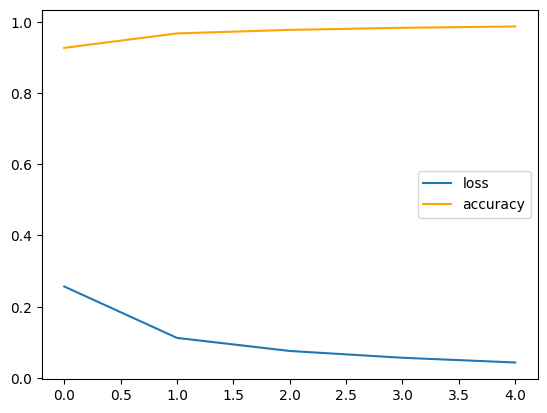

In [ ]:
plot_loss_curves(hist_2)

In [ ]:
misclass = []
predicted_prob = model.predict(X_test)
for i in range(len(X_test)):
  predicted_label = classes[predicted_prob.argmax()]
  true_label = classes[y_test[i]]
  if true_label != predicted_label:
    misclass.append(i)

313/313 [==============================] - 1s 2ms/step


In [ ]:
len(misclass)

8972